# Conjunto de dados para treinamento, validação e teste

In [1]:
DATASET = 'b2s'  # b2s ou bfs
TYPE = "multiespectral"

## Importação

In [2]:
from datetime import datetime
from os import listdir
from os.path import isfile, join

import os
import glob
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Metadados

In [3]:
dfs = dict()
for f in os.listdir("data"):
    if os.path.splitext(f)[-1] == '.csv':
        dfs[f] = pd.read_csv(os.path.join("data", f))
        
frames = []
for k in dfs:
    if DATASET in k and TYPE in k:
        frames.append(dfs[k])
metadata = pd.concat(frames)
metadata.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield
0,q170505tscrfl_fung_19,crop_tsc_2017_b2s,q170505tscrfl_fung_19_B1.tif,q170505tscrfl_fung_19_B2.tif,q170505tscrfl_fung_19_B3.tif,q170505tscrfl_fung_19_B4.tif,fung_19,1,4,19,17,Fungicide,1.0,6.055209
1,q170505tscrfl_fung_31,crop_tsc_2017_b2s,q170505tscrfl_fung_31_B1.tif,q170505tscrfl_fung_31_B2.tif,q170505tscrfl_fung_31_B3.tif,q170505tscrfl_fung_31_B4.tif,fung_31,2,7,31,19,Fungicide,1.0,4.081627
2,q170419tscrfl_fung_59,crop_tsc_2017_b2s,q170419tscrfl_fung_59_B1.tif,q170419tscrfl_fung_59_B2.tif,q170419tscrfl_fung_59_B3.tif,q170419tscrfl_fung_59_B4.tif,fung_59,3,12,59,10,Fungicide,1.0,4.612393


#### Adicionando data

In [4]:
from datetime import datetime

def extract_date(token):
    date = ''
    for s in token:
        if s.isdigit():
            date += s
    return datetime.strptime(date, '%y%m%d')

In [5]:
metadata['Date'] = metadata.apply(lambda x: extract_date(x['Instance'].split('_')[0]), axis=1)
metadata['Year'] = metadata.apply(lambda x: x.Date.year, axis=1)
metadata.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year
0,q170505tscrfl_fung_19,crop_tsc_2017_b2s,q170505tscrfl_fung_19_B1.tif,q170505tscrfl_fung_19_B2.tif,q170505tscrfl_fung_19_B3.tif,q170505tscrfl_fung_19_B4.tif,fung_19,1,4,19,17,Fungicide,1.0,6.055209,2017-05-05,2017
1,q170505tscrfl_fung_31,crop_tsc_2017_b2s,q170505tscrfl_fung_31_B1.tif,q170505tscrfl_fung_31_B2.tif,q170505tscrfl_fung_31_B3.tif,q170505tscrfl_fung_31_B4.tif,fung_31,2,7,31,19,Fungicide,1.0,4.081627,2017-05-05,2017
2,q170419tscrfl_fung_59,crop_tsc_2017_b2s,q170419tscrfl_fung_59_B1.tif,q170419tscrfl_fung_59_B2.tif,q170419tscrfl_fung_59_B3.tif,q170419tscrfl_fung_59_B4.tif,fung_59,3,12,59,10,Fungicide,1.0,4.612393,2017-04-19,2017


#### Ordenando por nome,crop,data

In [6]:
metadata = metadata.sort_values(['Name', 'Crop', 'Date'])
metadata.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year
82,c160407tscrfl_fung_1,crop_tsc_2016_b2s,c160407tscrfl_fung_1_B1.tif,c160407tscrfl_fung_1_B2.tif,c160407tscrfl_fung_1_B3.tif,c160407tscrfl_fung_1_B4.tif,fung_1,1,1,1,22,Fungicide,1.0,5.296382,2016-04-07,2016
335,c160418tscrfl_fung_1,crop_tsc_2016_b2s,c160418tscrfl_fung_1_B1.tif,c160418tscrfl_fung_1_B2.tif,c160418tscrfl_fung_1_B3.tif,c160418tscrfl_fung_1_B4.tif,fung_1,1,1,1,22,Fungicide,1.0,5.296382,2016-04-18,2016
565,c160428tscrfl_fung_1,crop_tsc_2016_b2s,c160428tscrfl_fung_1_B1.tif,c160428tscrfl_fung_1_B2.tif,c160428tscrfl_fung_1_B3.tif,c160428tscrfl_fung_1_B4.tif,fung_1,1,1,1,22,Fungicide,1.0,5.296382,2016-04-28,2016


#### Definindo a instância

In [7]:
metadata['Name'] = metadata.apply(lambda x: f'{(x.Name.split("_")[0])}_{int(x.Name.split("_")[1]):03}', axis=1)

In [8]:
metadata['Instance'] = metadata.apply(lambda x: f'{x.Name}_{x.Crop}', axis=1)

In [9]:
metadata.head()

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year
82,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,c160407tscrfl_fung_1_B1.tif,c160407tscrfl_fung_1_B2.tif,c160407tscrfl_fung_1_B3.tif,c160407tscrfl_fung_1_B4.tif,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-07,2016
335,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,c160418tscrfl_fung_1_B1.tif,c160418tscrfl_fung_1_B2.tif,c160418tscrfl_fung_1_B3.tif,c160418tscrfl_fung_1_B4.tif,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-18,2016
565,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,c160428tscrfl_fung_1_B1.tif,c160428tscrfl_fung_1_B2.tif,c160428tscrfl_fung_1_B3.tif,c160428tscrfl_fung_1_B4.tif,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-28,2016
10,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,c160511tscrfl_fung_1_B1.tif,c160511tscrfl_fung_1_B2.tif,c160511tscrfl_fung_1_B3.tif,c160511tscrfl_fung_1_B4.tif,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-05-11,2016
385,fung_001_crop_tsc_2017_b2s,crop_tsc_2017_b2s,q170419tscrfl_fung_1_B1.tif,q170419tscrfl_fung_1_B2.tif,q170419tscrfl_fung_1_B3.tif,q170419tscrfl_fung_1_B4.tif,fung_001,1,1,1,23,Fungicide,1.0,5.643749,2017-04-19,2017


In [10]:
for key in ['B1File', 'B2File', 'B3File', 'B4File']:
    metadata[key] = metadata.apply(lambda x: os.path.join('data', 'RAW', x['Crop'], x[key]), axis=1)
metadata.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year
82,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-07,2016
335,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-18,2016
565,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-28,2016


#### Definindo *Days after sowing*

In [11]:
sowing_2016 = datetime.strptime('2016-01-19', '%Y-%m-%d')
sowing_2017 = datetime.strptime('2017-01-24', '%Y-%m-%d')

def get_das(date):
    if date.year == 2016:
        return (date - sowing_2016).days
    elif date.year == 2017:
        return (date - sowing_2017).days

In [12]:
metadata['DAS'] = metadata.apply(lambda x: get_das(x.Date), axis=1)
metadata.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
82,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-07,2016,79
335,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-18,2016,90
565,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-28,2016,100


### Análise dos dados

In [13]:
def plot_freq_das(df):
    plt.figure(figsize=(8,3))
    evals = df['DAS'].value_counts()
    sns.barplot(evals.index, evals.values)
    plt.xticks(rotation='vertical')
    plt.xlabel('Pontuação')
    plt.ylabel('Dias')
    plt.title("Days after sowing")
    plt.show()

#### Frequência de TSC (Eval)

In [14]:
def plot_freq_tsc(df):
    plt.figure(figsize=(8,3))
    evals = df['Eval'].value_counts()
    sns.barplot(evals.index, evals.values)
    plt.xticks(rotation='vertical')
    plt.xlabel('Pontuação')
    plt.ylabel('Frequência')
    plt.show()

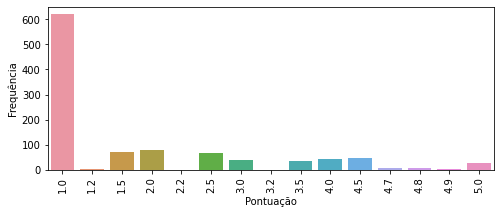

In [15]:
plot_freq_tsc(metadata)

[1 2 3]


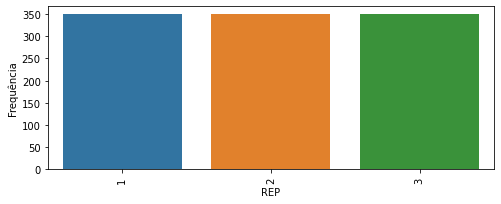

In [17]:
print(np.unique(np.asarray(metadata['REP'])))
plt.figure(figsize=(8,3))
evals = metadata['REP'].value_counts()
sns.barplot(evals.index, evals.values)
plt.xticks(rotation='vertical')
plt.xlabel('REP')
plt.ylabel('Frequência')
plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


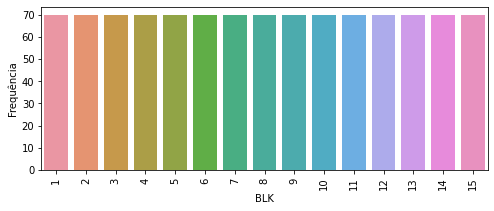

In [18]:
print(np.unique(np.asarray(metadata['BLK'])))
plt.figure(figsize=(8,3))
evals = metadata['BLK'].value_counts()
sns.barplot(evals.index, evals.values)
plt.xticks(rotation='vertical')
plt.xlabel('BLK')
plt.ylabel('Frequência')
plt.show()

## Train test split

### Rodada 1

Na rodada 1 serão usados dados sem fungicida. 

O split entre os sets de treinamento, teste e validação serão feitos com base no ano de cada instância.

O split entre os sets de treinamento e validação é aleatório.

In [16]:
trial1 = metadata[metadata.Trial != 'Fungicide']
trial1_train_val = trial1[trial1.Year == 2016]
trial1_test = trial1[trial1.Year == 2017] 
print("Tamanho dos dados de treinamento e validação: ", len(trial1_train_val))
print("Tamanho dos dados de teste: ", len(trial1_test))

Tamanho dos dados de treinamento e validação:  300
Tamanho dos dados de teste:  225


In [17]:
trial1_train_val.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
59,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,2.5,2.705875,2016-04-07,2016,79
267,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,3.5,2.705875,2016-04-18,2016,90
180,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,4.0,2.705875,2016-04-28,2016,100


In [18]:
trial1_test.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
115,nfung_001_crop_tsc_2017_b2s,crop_tsc_2017_b2s,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170419tscrfl_nfung...,nfung_001,1,1,1,25,No fungicide,4.5,2.806167,2017-04-19,2017,85
196,nfung_001_crop_tsc_2017_b2s,crop_tsc_2017_b2s,data/RAW/crop_tsc_2017_b2s/q170428tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170428tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170428tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170428tscrfl_nfung...,nfung_001,1,1,1,25,No fungicide,5.0,2.806167,2017-04-28,2017,94
291,nfung_001_crop_tsc_2017_b2s,crop_tsc_2017_b2s,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_nfung...,data/RAW/crop_tsc_2017_b2s/q170505tscrfl_nfung...,nfung_001,1,1,1,25,No fungicide,5.0,2.806167,2017-05-05,2017,101


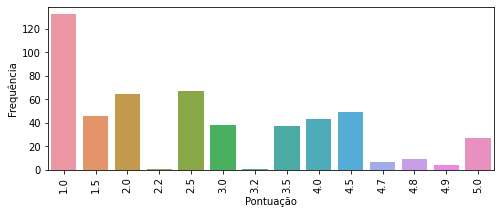

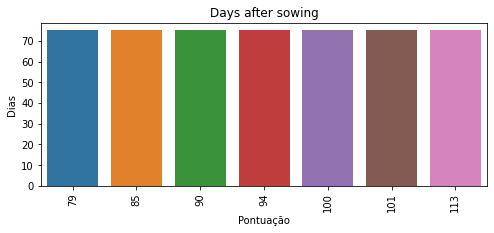

In [19]:
plot_freq_tsc(trial1)
plot_freq_das(trial1)

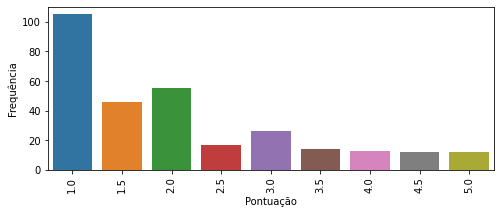

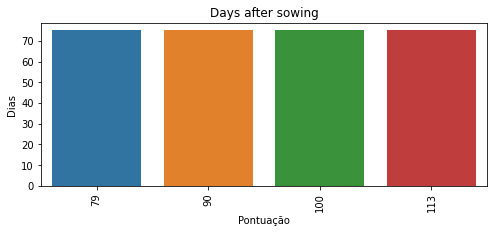

In [20]:
plot_freq_tsc(trial1_train_val)
plot_freq_das(trial1_train_val)

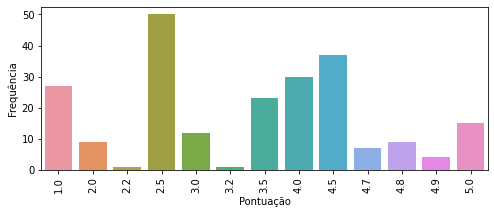

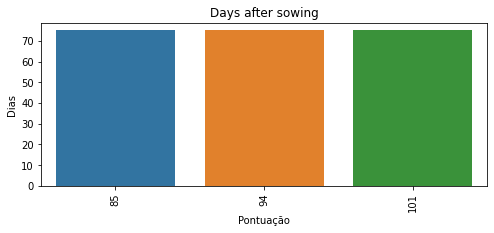

In [21]:
plot_freq_tsc(trial1_test)
plot_freq_das(trial1_test)

### Rodada 2

Na rodada 2 também serão usados dados sem fungicida. 

O split entre os sets de treinamento, teste e validação serão feitos na repetição do experimento.

O split entre os sets de teste e validação é aleatório.

In [22]:
trial2 = metadata[metadata.Trial != 'Fungicide']
trial2_train = trial1[trial2.REP < 3]
trial2_val_test = trial1[trial2.REP == 3]
print("Tamanho dos dados de treinamento: ", len(trial2_train))
print("Tamanho dos dados de validação e teste: ", len(trial2_val_test))

Tamanho dos dados de treinamento:  350
Tamanho dos dados de validação e teste:  175


In [23]:
trial2_train.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
59,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,2.5,2.705875,2016-04-07,2016,79
267,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,3.5,2.705875,2016-04-18,2016,90
180,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,4.0,2.705875,2016-04-28,2016,100


In [24]:
trial2_val_test.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
157,nfung_051_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,nfung_051,3,11,51,11,No fungicide,1.5,0.685118,2016-04-07,2016,79
450,nfung_051_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,nfung_051,3,11,51,11,No fungicide,1.5,0.685118,2016-04-18,2016,90
494,nfung_051_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,nfung_051,3,11,51,11,No fungicide,2.0,0.685118,2016-04-28,2016,100


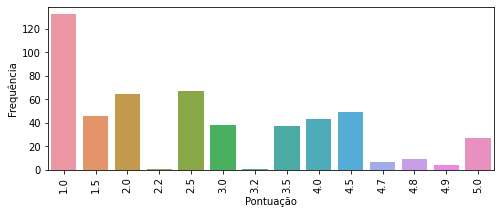

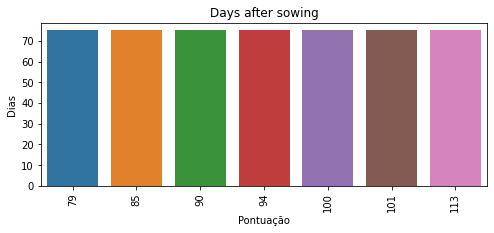

In [25]:
plot_freq_tsc(trial2)
plot_freq_das(trial2)

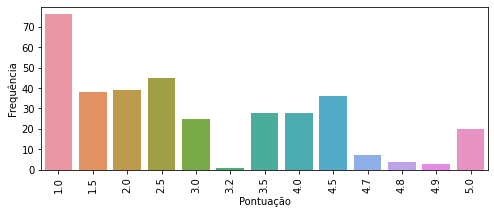

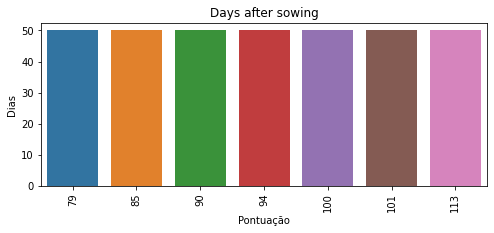

In [26]:
plot_freq_tsc(trial2_train)
plot_freq_das(trial2_train)

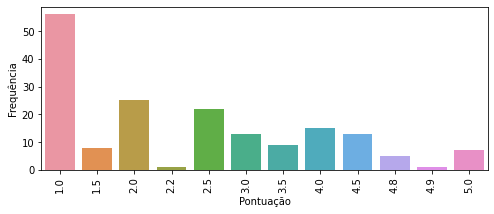

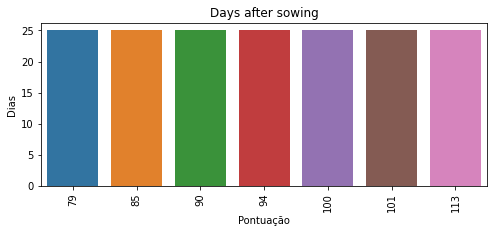

In [27]:
plot_freq_tsc(trial2_val_test)
plot_freq_das(trial2_val_test)

### Rodada 3

Na rodada 3 serão usados dados com fungicida (teste) e sem fungicida (treinamento e validação). 

O split entre os sets de treinamento, teste e validação serão feitos de forma aleatória.

In [28]:
trial3_val_train = metadata[metadata.Trial != 'Fungicide']
trial3_test = metadata[metadata.Trial == 'Fungicide']
print("Tamanho dos dados de validação e treinamento: ", len(trial3_val_train))
print("Tamanho dos dados de teste: ", len(trial3_test))

Tamanho dos dados de validação e treinamento:  525
Tamanho dos dados de teste:  525


In [29]:
trial3_val_train.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
59,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,2.5,2.705875,2016-04-07,2016,79
267,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,3.5,2.705875,2016-04-18,2016,90
180,nfung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_nfung...,nfung_001,1,1,1,24,No fungicide,4.0,2.705875,2016-04-28,2016,100


In [30]:
trial3_test.head(3)

,Instance,Crop,B1File,B2File,B3File,B4File,Name,REP,BLK,PLOT,ENTRY,Trial,Eval,Yield,Date,Year,DAS
82,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160407tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-07,2016,79
335,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160418tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-18,2016,90
565,fung_001_crop_tsc_2016_b2s,crop_tsc_2016_b2s,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,data/RAW/crop_tsc_2016_b2s/c160428tscrfl_fung_...,fung_001,1,1,1,22,Fungicide,1.0,5.296382,2016-04-28,2016,100


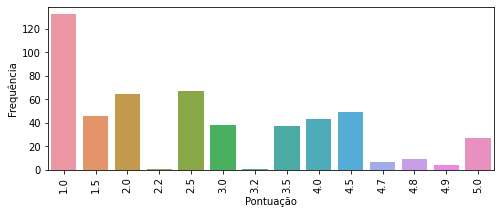

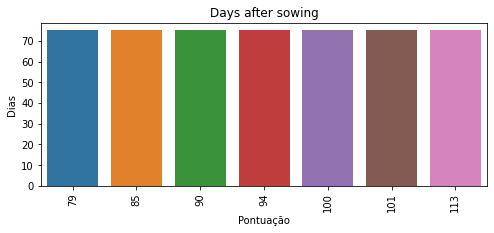

In [31]:
plot_freq_tsc(trial3_val_train)
plot_freq_das(trial3_val_train)

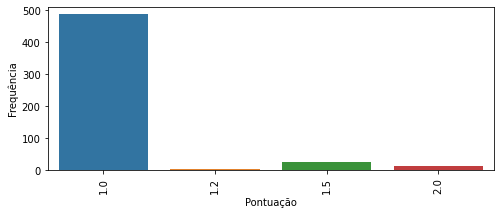

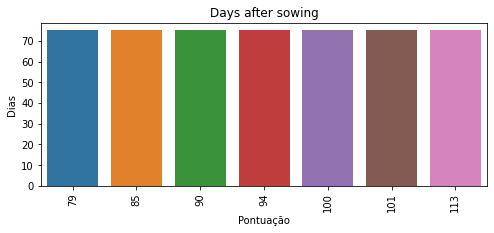

In [32]:
plot_freq_tsc(trial3_test)
plot_freq_das(trial3_test)